### PNS: Previsão de acidentes de trânsito com lesão

### Variável alvo

O009: Nos últimos doze meses, o(a) Sr(a) se envolveu em algum acidente de trânsito no qual tenha sofrido lesões corporais 
1) Sim, 2) Não, ) Não aplicavel

### Variáveis auxiliares

O00101: Atualmente, o(a) Sr(a) dirige automóvel (inclusive táxi, aplicativos de transporte e similares)
1) Sim, 2) Não, ) Não aplicavel

O00401: Com que frequência o(a) Sr(a) usa cinto de segurança quando dirige automóvel (inclusive táxi, aplicativos de transporte e similares)?
1) Sempre, 2) Quase Sempre, 3) Às vezes, 4) Raramente, 5) Nunca, ) Não aplicavel

O00402: Com que frequência o(a) Sr(a) usa cinto de segurança quando anda no banco da frente como passageiro de automóvel (inclusive táxi, aplicativos de transporte e similares)?
1) Sempre, 2) Quase Sempre, 3) Às vezes, 4) Raramente, 5) Nunca, ) Não aplicavel

O00501: Com que frequência o(a) Sr(a) usa cinto de segurança quando anda no banco de trás de automóvel (inclusive táxi, aplicativos de transporte e similares)?
1) Sempre, 2) Quase Sempre, 3) Às vezes, 4) Raramente, 5) Nunca, ) Não aplicavel

O00201: Atualmente, o(a) Sr(a) dirige motocicleta
1) Sim, 2) Não, ) Não aplicavel

O00701: Com que frequência o(a) Sr(a) usa capacete quando dirige motocicleta
1) Sempre, 2) Quase Sempre, 3) Às vezes, 4) Raramente, 5) Nunca, ) Não aplicavel

O00801: Com que frequência o(a) Sr(a) usa capacete quando anda como passageiro de motocicleta
1) Nunca anda como passageiro, 2) Sempre, 3) Quase Sempre, 4) Às vezes, 5) Raramente, 6) Nunca, ) Não aplicavel

O00802: Com que frequência o (a) senhor (a) manuseia o celular durante a condução de moto ou automóvel (inclusive táxi, aplicativos de transporte e similares)?
1) Sempre, 2) Quase Sempre, 3) Às vezes, 4) Raramente, 5) Nunca, ) Não aplicavel

O00803: Com que frequência o (a) senhor (a) conduz moto ou automóvel (inclusive táxi, aplicativos de transporte e similares) acima da velocidade da via?
1) Sempre, 2) Quase Sempre, 3) Às vezes, 4) Raramente, 5) Nunca, ) Não aplicavel

C008:  Idade do morador na data de referência
000 a 130

C006: Sexo
1) Homem, 2) Mulher, ) Não apliclavel

V0001: Unidade da Federação

 11) Rondônia, 12) Acre, 13) Amazonas, 14) Roraima, 15) Pará, 16) Amapá, 17) Tocantins, 21) Maranhão, 22) Piauí, 23) Ceará, 24) Rio Grande do Norte, 25) Paraíba, 26) Pernambuco, 27) Alagoas, 28) Sergipe, 29) Bahia, 31) Minas Gerais, 32) Espírito Santo, 33) Rio de Janeiro, 35) São Paulo, 41) Paraná, 42) Santa Catarina, 43) Rio Grande do Sul, 50) Mato Grosso do Sul, 51) Mato Grosso, 52) Goiás, 53) Distrito Federal

A018025: Neste domicílio existe motocicleta
1) Sim, 2) Não, ) Ignorado

A018027: Neste domicílio existe automóvel
1) Sim, 2) Não, ) Ignorado

V0031: Tipo de área
1) Capital, 2) Resto da RM, 3) RIDE, 4)Resto da UF

## Imports

In [3]:
import pandas as pd
import numpy as np
import logging
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, f1_score, recall_score
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.utils import resample
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTEENN
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA

## Leitura do csv

In [142]:
df = pd.read_csv('pns2019.csv')

## Removendo todas colunas que tem a variável alvo nula

In [143]:
df = df.dropna(subset=['O009'])

In [144]:
df.head()

,V0001,V0024,UPA_PNS,V0006_PNS,V0015,V0020,V0022,V0026,V0031,V0025A,...,VDE002,VDE014,VDF002,VDF003,VDF004,VDL001,VDM001,VDP001,VDR001,VDDATA
0,11,1110011,110000016,1,1,2019,6.0,1,1,1.0,...,1.0,6.0,2098.0,350.0,2.0,NaN,NaN,NaN,NaN,20210825
9,11,1110011,110000016,2,1,2019,4.0,1,1,1.0,...,1.0,6.0,1000.0,250.0,2.0,NaN,NaN,NaN,NaN,20210825
10,11,1110011,110000016,3,1,2019,8.0,1,1,1.0,...,1.0,9.0,4000.0,500.0,3.0,NaN,4.0,NaN,1.0,20210825
18,11,1110011,110000016,4,1,2019,1.0,1,1,1.0,...,1.0,7.0,324.0,324.0,2.0,NaN,1.0,NaN,NaN,20210825
19,11,1110011,110000016,5,1,2019,2.0,1,1,1.0,...,NaN,NaN,0.0,0.0,1.0,NaN,NaN,NaN,NaN,20210825


In [145]:
df.shape

(90846, 1087)

## Filtrando colunas relevantes para a análise

In [146]:
# Filtra todas as colunas que contêm 'O0' no nome (relacionadas a acidentes de trânsito)
df_filter = df.filter(like='O0')

# Variáveis adicionais que podem ajudar no problema
colunas_adicionais = [
    'C008',   # Idade
    'C006',   # Gênero
    'V0001',  # Localização (Estado ou Região)
    'A018027', 'A018028',  # Propriedade de veículo (carro ou moto)
    'V0031' # Tipo de área
]

# Verifica se as colunas existem no DataFrame antes de tentar adicionar
colunas_existentes = [col for col in colunas_adicionais if col in df.columns]

# Adiciona as colunas relevantes ao DataFrame filtrado
df_filter = df_filter.join(df[colunas_existentes])

# Exibe as primeiras linhas do DataFrame filtrado
print(df_filter.head())

    O00101  O00401  O00402  O00501  O00201  O00701  O00801  O00802  O00803  \
0      2.0     NaN     2.0     6.0     2.0     NaN     1.0     NaN     NaN   
9      2.0     NaN     2.0     5.0     1.0     1.0     2.0     5.0     5.0   
10     2.0     NaN     2.0     6.0     2.0     NaN     2.0     NaN     NaN   
18     2.0     NaN     2.0     5.0     2.0     NaN     2.0     NaN     NaN   
19     2.0     NaN     2.0     2.0     1.0     1.0     2.0     5.0     5.0   

    O009  ...  O02101  O02201  O023  O02401  C008  C006  V0001  A018027  \
0    2.0  ...     NaN     NaN   NaN     NaN  55.0   2.0     11      2.0   
9    2.0  ...     NaN     NaN   NaN     NaN  19.0   2.0     11      2.0   
10   2.0  ...     NaN     NaN   NaN     NaN  45.0   2.0     11      2.0   
18   2.0  ...     NaN     NaN   NaN     NaN  58.0   2.0     11      2.0   
19   2.0  ...     NaN     NaN   NaN     NaN  28.0   2.0     11      2.0   

    A018028  V0031  
0       NaN      1  
9       NaN      1  
10      NaN      

In [147]:
# Contar nulos
df_filter.isnull().sum()

O00101         0
O00401     59477
O00402         0
O00501         0
O00201         0
O00701     68443
O00801         0
O00802     48961
O00803     48961
O009           0
O00901     88589
O010       88589
O01102     88589
O01401     88589
O01501     88589
O01602     89379
O01702     90543
O019       89379
O02001     89379
O021       38014
O02101     89459
O02201     89459
O023       89459
O02401     89459
C008           0
C006           0
V0001          0
A018027        0
A018028    52082
V0031          0
dtype: int64

## Removendo colunas correlacionadas ao alvo

In [148]:
colunas_correlacionadas = ['O00901', 'O010', 'O01102', 'O01401', 'O01501', 
                     'O01602', 'O01702', 'O019', 'O02001', 'O021', 
                     'O02101', 'O02201', 'O023', 'O02401']

df_filter = df_filter.drop(columns=colunas_correlacionadas)

print(df_filter.head())

# Contar nulos
df_filter.isnull().sum()

    O00101  O00401  O00402  O00501  O00201  O00701  O00801  O00802  O00803  \
0      2.0     NaN     2.0     6.0     2.0     NaN     1.0     NaN     NaN   
9      2.0     NaN     2.0     5.0     1.0     1.0     2.0     5.0     5.0   
10     2.0     NaN     2.0     6.0     2.0     NaN     2.0     NaN     NaN   
18     2.0     NaN     2.0     5.0     2.0     NaN     2.0     NaN     NaN   
19     2.0     NaN     2.0     2.0     1.0     1.0     2.0     5.0     5.0   

    O009  C008  C006  V0001  A018027  A018028  V0031  
0    2.0  55.0   2.0     11      2.0      NaN      1  
9    2.0  19.0   2.0     11      2.0      NaN      1  
10   2.0  45.0   2.0     11      2.0      NaN      1  
18   2.0  58.0   2.0     11      2.0      NaN      1  
19   2.0  28.0   2.0     11      2.0      NaN      1  


O00101         0
O00401     59477
O00402         0
O00501         0
O00201         0
O00701     68443
O00801         0
O00802     48961
O00803     48961
O009           0
C008           0
C006           0
V0001          0
A018027        0
A018028    52082
V0031          0
dtype: int64

## Mapeando valores para visualizar dados de forma categórica

In [149]:
# Definir mapeamentos dos valores com base no dicionário de dados
map_simnao = {1: 'Sim', 2: 'Não'}
map_geral =    {1: 'Sempre', 2: 'Quase Sempre', 3: 'Às vezes', 4: 'Raramente', 5: 'Nunca'}
map_passageiro = {1: 'Nunca anda como passageiro', 2: 'Sempre', 3: 'Quase Sempre', 4: 'Às vezes', 5: 'Raramente', 6: 'Nunca'}
map_sexo = {1: 'Homem', 2: 'Mulher', 9: 'Não aplicável'}
map_uf = {11: 'Rondônia', 12: 'Acre', 13: 'Amazonas', 14: 'Roraima', 15: 'Pará', 16: 'Amapá', 17: 'Tocantins', 21: 'Maranhão', 22: 'Piauí', 23: 'Ceará', 24: 'Rio Grande do Norte', 25: 'Paraíba', 26: 'Pernambuco', 27: 'Alagoas', 28: 'Sergipe', 29: 'Bahia', 31: 'Minas Gerais', 32: 'Espírito Santo', 33: 'Rio de Janeiro', 35: 'São Paulo', 41: 'Paraná', 42: 'Santa Catarina', 43: 'Rio Grande do Sul', 50: 'Mato Grosso do Sul', 51: 'Mato Grosso', 52: 'Goiás', 53: 'Distrito Federal'}
map_automovel = {1: 'Sim', 2: 'Não', 9: 'Ignorado'}
map_motocicleta = {1: 'Sim', 2: 'Não', 9: 'Ignorado'}
map_tipo_area = {1: 'Capital', 2: 'Resto da RM', 3: 'RIDE', 4: 'Resto da UF'}

mapeamentos = {
    'O009': map_simnao,
    'O00101': map_simnao,
    'O00401': map_geral,
    'O00402': map_geral,
    'O00201': map_geral,
    'O00501': map_geral,
    'O00701': map_geral,
    'O00801': map_passageiro,
    'O00802': map_geral,
    'O00803': map_geral,
}

# Aplicar mapeamentos
for coluna, mapeamento in mapeamentos.items():
    if coluna in df_filter.columns:
        df_filter[coluna] = df_filter[coluna].map(mapeamento)
        df_filter[coluna] = df_filter[coluna].astype('category')

# Verificar as substituições
print(df_filter[list(mapeamentos.keys())].head())


   O009 O00101 O00401        O00402        O00201        O00501  O00701  \
0   Não    Não    NaN  Quase Sempre  Quase Sempre           NaN     NaN   
9   Não    Não    NaN  Quase Sempre        Sempre         Nunca  Sempre   
10  Não    Não    NaN  Quase Sempre  Quase Sempre           NaN     NaN   
18  Não    Não    NaN  Quase Sempre  Quase Sempre         Nunca     NaN   
19  Não    Não    NaN  Quase Sempre        Sempre  Quase Sempre  Sempre   

                        O00801 O00802 O00803  
0   Nunca anda como passageiro    NaN    NaN  
9                       Sempre  Nunca  Nunca  
10                      Sempre    NaN    NaN  
18                      Sempre    NaN    NaN  
19                      Sempre  Nunca  Nunca  


## Renomeando colunas para nomes que fazem mais sentido

In [150]:
# Definir o mapeamento de nomes antigos para novos nomes
novo_nome_colunas = {
    'O009': 'Envolveu_Acidente_Ult12Meses',
    'O00101': 'Dirige_Automovel',
    'O00401': 'Uso_Cinto_Seguranca_Dirige',
    'O00402': 'Uso_Cinto_Seguranca_Passageiro_Frente',
    'O00201': 'Dirige_Moto',
    'O00501': 'Uso_Cinto_Seguranca_Passageiro_Traseiro',
    'O00701': 'Uso_Capacete_Dirige_Moto',
    'O00801': 'Uso_Capacete_Passageiro_Moto',
    'O00802': 'Manuseia_Celular_Conducao',
    'O00803': 'Conduz_Acima_Velocidade',
    'C008': 'Idade_Morador',
    'C006': 'Sexo',
    'V0001': 'Unidade_Federacao',
    'A018027': 'Possui_Automovel',
    'A018028': 'Possui_Motocicleta',
    'V0031': 'Tipo_Area',
}

# Renomear as colunas
df_filter = df_filter.rename(columns=novo_nome_colunas)

df_filter.head()

,Dirige_Automovel,Uso_Cinto_Seguranca_Dirige,Uso_Cinto_Seguranca_Passageiro_Frente,Uso_Cinto_Seguranca_Passageiro_Traseiro,Dirige_Moto,Uso_Capacete_Dirige_Moto,Uso_Capacete_Passageiro_Moto,Manuseia_Celular_Conducao,Conduz_Acima_Velocidade,Envolveu_Acidente_Ult12Meses,Idade_Morador,Sexo,Unidade_Federacao,Possui_Automovel,Possui_Motocicleta,Tipo_Area
0,Não,NaN,Quase Sempre,NaN,Quase Sempre,NaN,Nunca anda como passageiro,NaN,NaN,Não,55.0,2.0,11,2.0,NaN,1
9,Não,NaN,Quase Sempre,Nunca,Sempre,Sempre,Sempre,Nunca,Nunca,Não,19.0,2.0,11,2.0,NaN,1
10,Não,NaN,Quase Sempre,NaN,Quase Sempre,NaN,Sempre,NaN,NaN,Não,45.0,2.0,11,2.0,NaN,1
18,Não,NaN,Quase Sempre,Nunca,Quase Sempre,NaN,Sempre,NaN,NaN,Não,58.0,2.0,11,2.0,NaN,1
19,Não,NaN,Quase Sempre,Quase Sempre,Sempre,Sempre,Sempre,Nunca,Nunca,Não,28.0,2.0,11,2.0,NaN,1


## Separando colunas por tipo

In [151]:
# Colunas Nominais
colunas_nominais = [
    'Dirige_Automovel',
    'Dirige_Moto',
    'Manuseia_Celular_Conducao',
    'Conduz_Acima_Velocidade',
    'Sexo',
    'Unidade_Federacao',
    'Possui_Automovel',
    'Possui_Motocicleta',
    'Tipo_Area',
]

# Colunas Ordinais
colunas_ordinais = [
    'Uso_Cinto_Seguranca_Dirige',
    'Uso_Cinto_Seguranca_Passageiro_Frente',
    'Uso_Cinto_Seguranca_Passageiro_Traseiro',
    'Uso_Capacete_Dirige_Moto',
    'Uso_Capacete_Passageiro_Moto',
]

# Colunas Numéricas
colunas_numericas = [
    'Idade_Morador',
]

## Imputação de valores

In [152]:
# Definir os imputadores
imputer_mode = SimpleImputer(strategy='most_frequent')
imputer_median = SimpleImputer(strategy='median')

# Combinar colunas nominais e ordinais para tratar como categóricas
colunas_categoricas = colunas_nominais + colunas_ordinais

# Verificar se as colunas categóricas existem no DataFrame
cols_mode_present = [col for col in colunas_categoricas if col in df_filter.columns]

# Aplicar a imputação para colunas categóricas
if cols_mode_present:
    df_filter[cols_mode_present] = imputer_mode.fit_transform(df_filter[cols_mode_present])
    print(f"Imputação com a moda aplicada nas colunas categóricas: {cols_mode_present}")

# Verificar se as colunas numéricas existem no DataFrame
cols_median_present = [col for col in colunas_numericas if col in df_filter.columns]

# Aplicar a imputação para colunas numéricas
if cols_median_present:
    df_filter[cols_median_present] = imputer_median.fit_transform(df_filter[cols_median_present])
    print(f"Imputação com a mediana aplicada nas colunas numéricas: {cols_median_present}")

Imputação com a moda aplicada nas colunas categóricas: ['Dirige_Automovel', 'Dirige_Moto', 'Manuseia_Celular_Conducao', 'Conduz_Acima_Velocidade', 'Sexo', 'Unidade_Federacao', 'Possui_Automovel', 'Possui_Motocicleta', 'Tipo_Area', 'Uso_Cinto_Seguranca_Dirige', 'Uso_Cinto_Seguranca_Passageiro_Frente', 'Uso_Cinto_Seguranca_Passageiro_Traseiro', 'Uso_Capacete_Dirige_Moto', 'Uso_Capacete_Passageiro_Moto']
Imputação com a mediana aplicada nas colunas numéricas: ['Idade_Morador']


In [153]:
df_filter.head()

,Dirige_Automovel,Uso_Cinto_Seguranca_Dirige,Uso_Cinto_Seguranca_Passageiro_Frente,Uso_Cinto_Seguranca_Passageiro_Traseiro,Dirige_Moto,Uso_Capacete_Dirige_Moto,Uso_Capacete_Passageiro_Moto,Manuseia_Celular_Conducao,Conduz_Acima_Velocidade,Envolveu_Acidente_Ult12Meses,Idade_Morador,Sexo,Unidade_Federacao,Possui_Automovel,Possui_Motocicleta,Tipo_Area
0,Não,Sempre,Quase Sempre,Quase Sempre,Quase Sempre,Sempre,Nunca anda como passageiro,Nunca,Nunca,Não,55.0,2.0,11,2.0,1.0,1
9,Não,Sempre,Quase Sempre,Nunca,Sempre,Sempre,Sempre,Nunca,Nunca,Não,19.0,2.0,11,2.0,1.0,1
10,Não,Sempre,Quase Sempre,Quase Sempre,Quase Sempre,Sempre,Sempre,Nunca,Nunca,Não,45.0,2.0,11,2.0,1.0,1
18,Não,Sempre,Quase Sempre,Nunca,Quase Sempre,Sempre,Sempre,Nunca,Nunca,Não,58.0,2.0,11,2.0,1.0,1
19,Não,Sempre,Quase Sempre,Quase Sempre,Sempre,Sempre,Sempre,Nunca,Nunca,Não,28.0,2.0,11,2.0,1.0,1


## Análise de outliers (esperados, já que se trata de saúde)

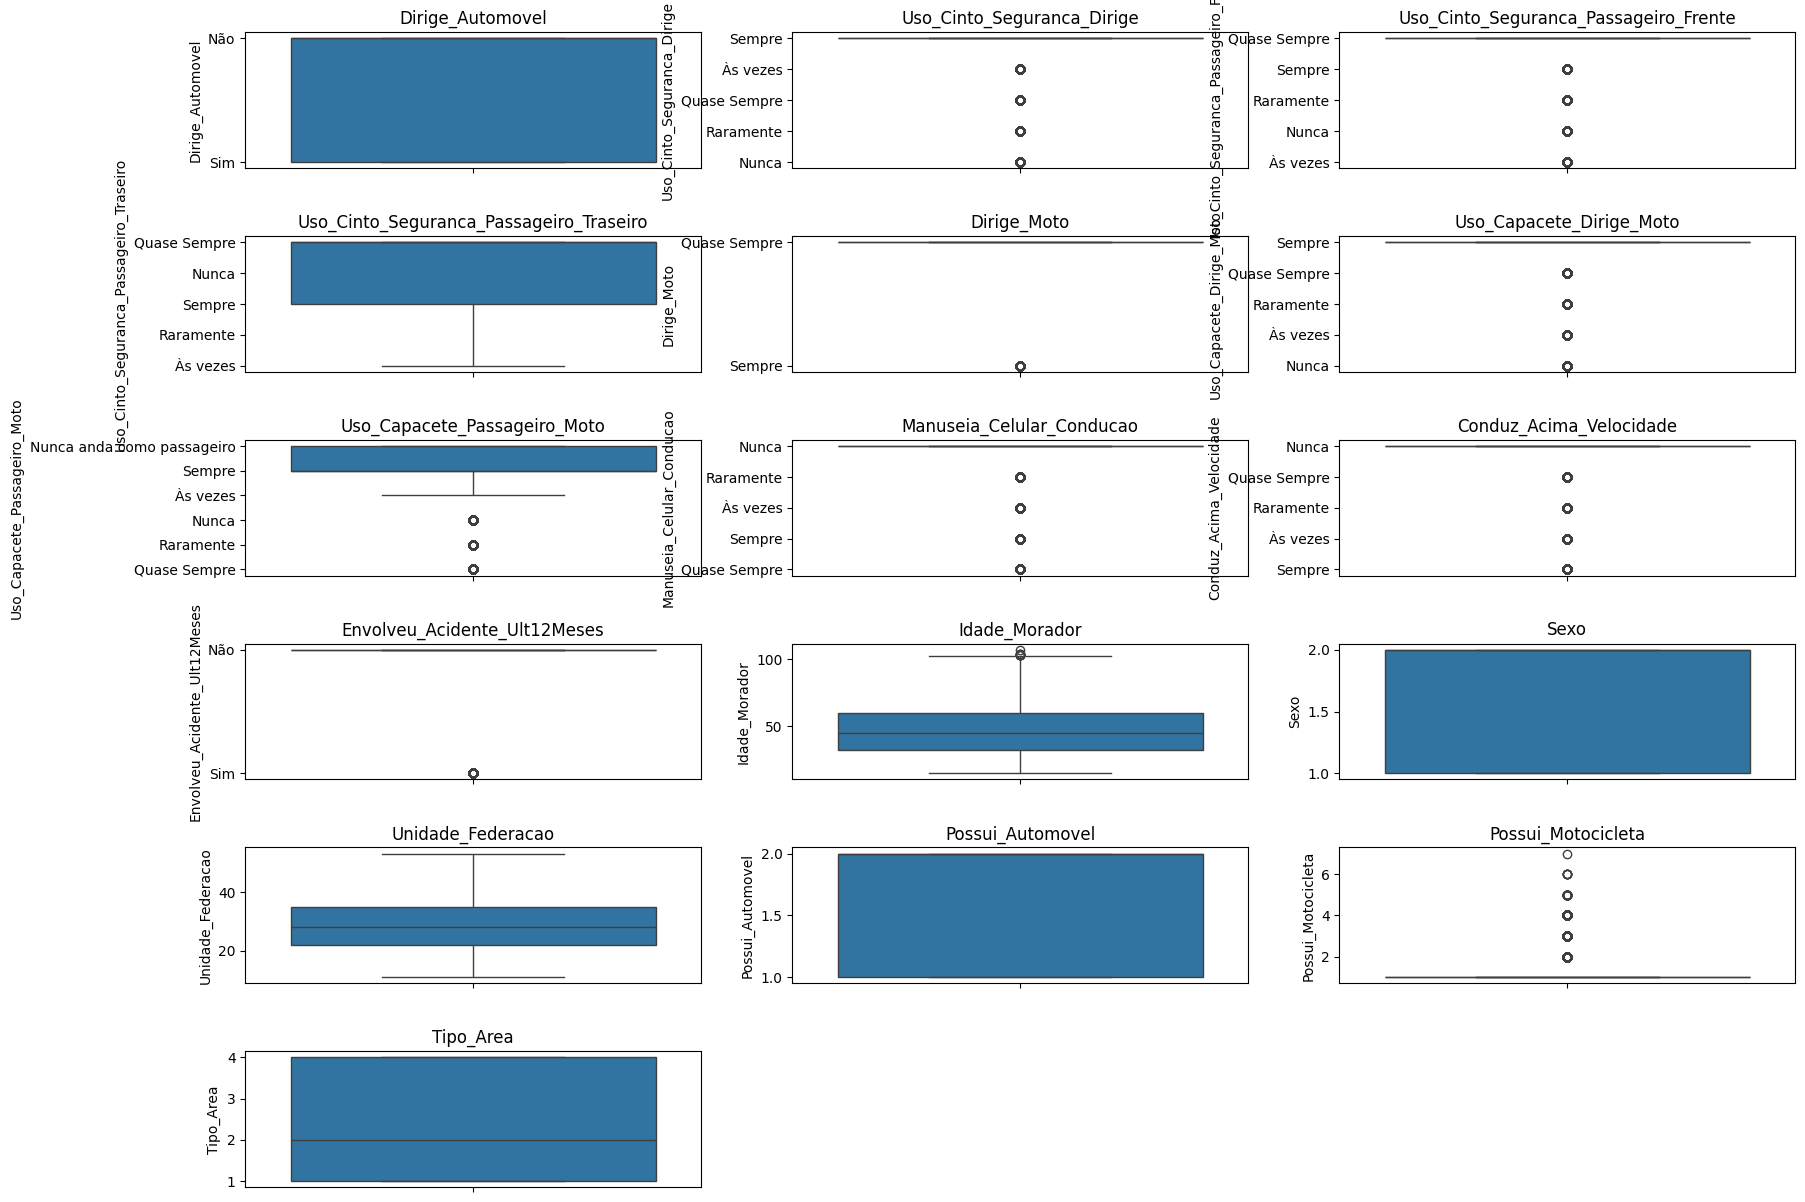

In [154]:
num_cols = 3 
num_rows = (len(df_filter.columns) // num_cols) + 1

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 15))

plt.subplots_adjust(hspace=0.5)

# Loop sobre as colunas e plotar cada boxplot em um subplot
for i, column in enumerate(df_filter.columns):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(data=df_filter[column], ax=axes[row, col])
    axes[row, col].set_title(column)

# Remover subplots vazios, caso o número de colunas não seja divisível
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes.flatten()[j])

# Exibir o gráfico
plt.show()

## Visualização de Dados

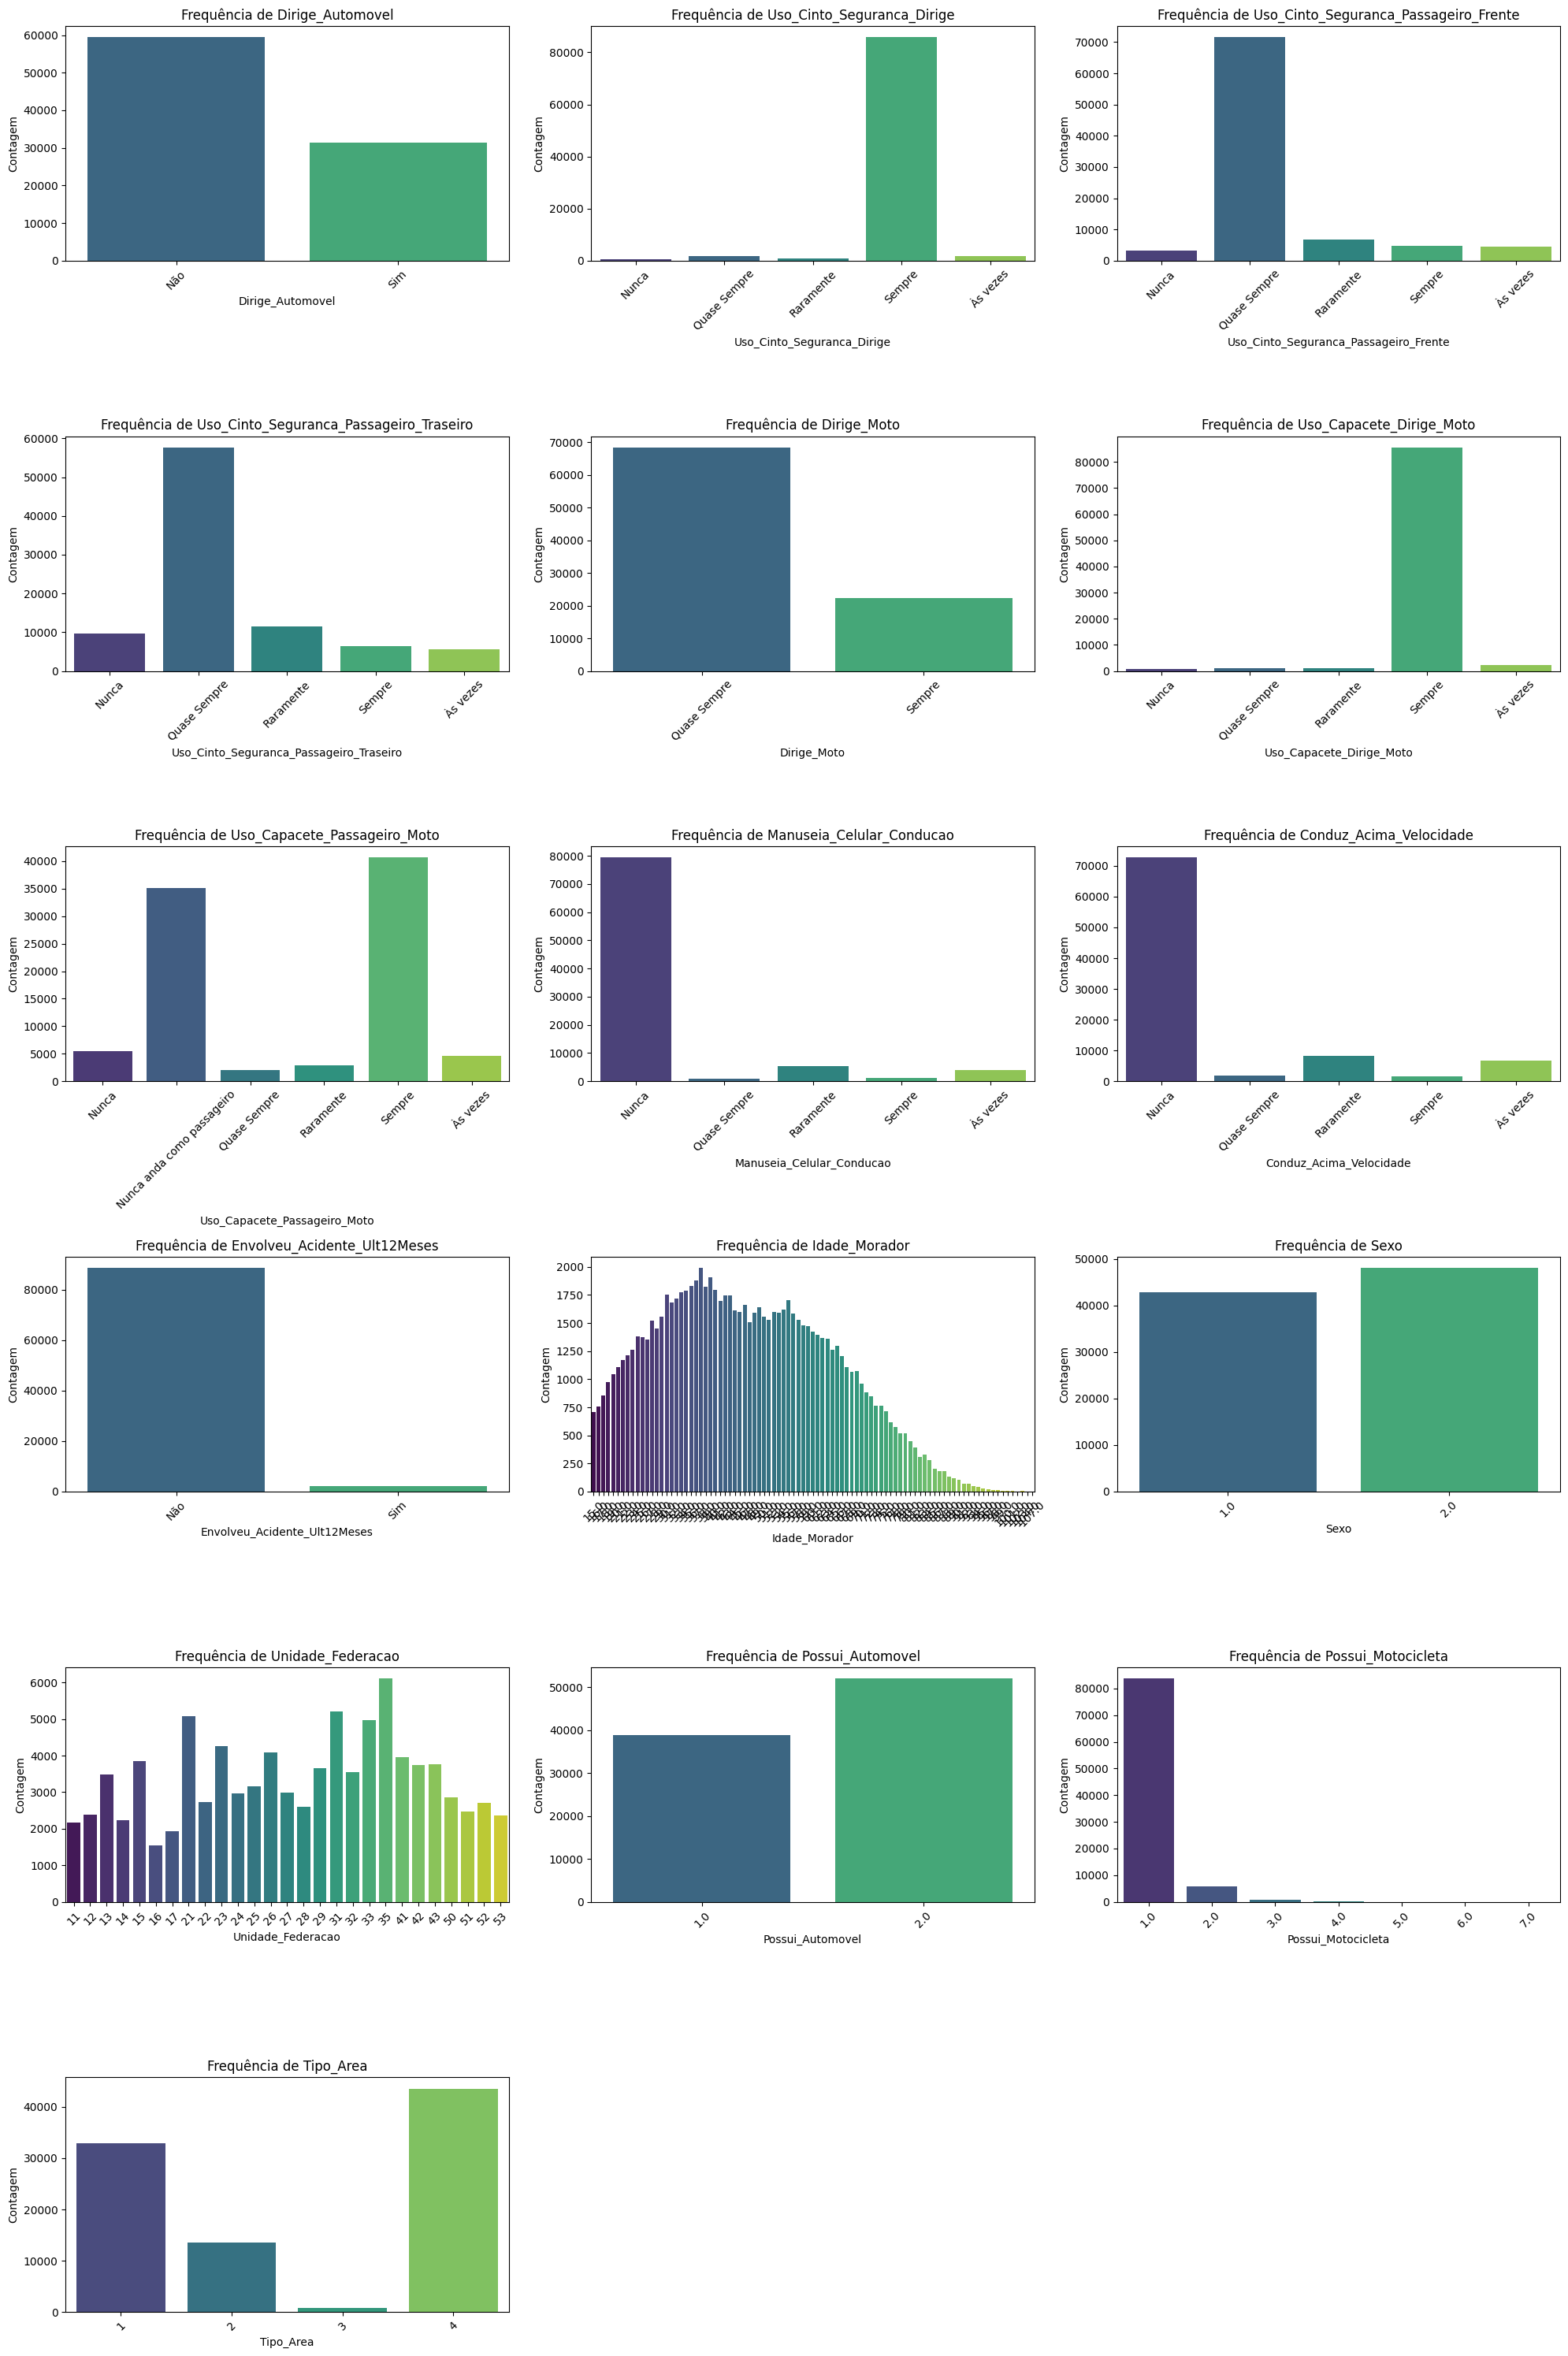

In [155]:
import warnings

# Suprimir apenas FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Definir número de colunas e calcular número de linhas para os subplots
num_cols = 3
num_rows = (len(df_filter.columns) // num_cols) + 1

# Criar subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, num_rows * 5))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Flatten os eixos para facilitar a iteração
axes = axes.flatten()

# Loop sobre as colunas e plotar cada gráfico de barras em um subplot
for i, column in enumerate(df_filter.columns):
    ax = axes[i]
    # Contar a frequência de cada valor na coluna
    counts = df_filter[column].value_counts().sort_index()
    sns.barplot(x=counts.index, y=counts.values, ax=ax, palette='viridis')
    ax.set_title(f"Frequência de {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Contagem")
    ax.tick_params(axis='x', rotation=45)

# Remover subplots vazios, caso o número de colunas não seja divisível por num_cols
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j])

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()

## Codificando variáveis

In [156]:
# Definir a ordem das categorias para colunas ordinais
categorias_ordinais = [
    ['Sempre', 'Quase Sempre', 'Às vezes', 'Raramente', 'Nunca'],  # Uso_Cinto_Seguranca_Dirige
    ['Sempre', 'Quase Sempre', 'Às vezes', 'Raramente', 'Nunca'],  # Uso_Cinto_Seguranca_Passageiro_Frente
    ['Sempre', 'Quase Sempre', 'Às vezes', 'Raramente', 'Nunca'],  # Uso_Cinto_Seguranca_Passageiro_Traseiro
    ['Sempre', 'Quase Sempre', 'Às vezes', 'Raramente', 'Nunca'],  # Uso_Capacete_Dirige_Moto
    ['Nunca anda como passageiro', 'Sempre', 'Quase Sempre', 'Às vezes', 'Raramente', 'Nunca'],  # Uso_Capacete_Passageiro_Moto
]

In [157]:
# Inicializar OneHotEncoder para colunas nominais
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')

# Inicializar OrdinalEncoder para colunas ordinais
ordinal_encoder = OrdinalEncoder(categories=categorias_ordinais)

# Codificação das colunas nominais usando OneHotEncoder
if colunas_nominais:
    # Ajustar e transformar as colunas nominais
    ohe_array = ohe.fit_transform(df_filter[colunas_nominais])
    ohe_cols = ohe.get_feature_names_out(colunas_nominais)
    
    # Criar um DataFrame com as novas colunas One-Hot
    df_ohe = pd.DataFrame(ohe_array, columns=ohe_cols, index=df_filter.index)
    
    # Concatenar o DataFrame One-Hot com o DataFrame original e remover as colunas nominais originais
    df_filter = pd.concat([df_filter.drop(columns=colunas_nominais), df_ohe], axis=1)
    
    print(f"One-hot encoding aplicado nas colunas nominais: {colunas_nominais}")

# Codificação das colunas ordinais usando OrdinalEncoder
if colunas_ordinais:
    # Ajustar e transformar as colunas ordinais
    ordinal_array = ordinal_encoder.fit_transform(df_filter[colunas_ordinais])
    
    # Converter o array resultante em um DataFrame e substituir as colunas originais
    df_filter[colunas_ordinais] = ordinal_array.astype(int)
    
    print(f"Ordinal encoding aplicado nas colunas ordinais: {colunas_ordinais}")
    
# Inicializar o StandardScaler para colunas numericas
scaler = StandardScaler()

# Ajustar e transformar as colunas numéricas diretamente no df_filter
df_filter[colunas_numericas] = scaler.fit_transform(df_filter[colunas_numericas])

# Inicializar o LabelEncoder para a variável alvo
le = LabelEncoder()

# Definir a coluna alvo
coluna_alvo = 'Envolveu_Acidente_Ult12Meses'

# Aplicar o LabelEncoder na coluna alvo diretamente no df_filter
df_filter[coluna_alvo] = le.fit_transform(df_filter[coluna_alvo])

# Verificar as substituições, imputações e codificações
print("\nPrimeiras linhas do DataFrame após codificação:")
print(df_filter.head())

# Visualizar os tipos de dados das colunas após codificação
print("\nTipos de dados das colunas após codificação:")
print(df_filter.dtypes)

One-hot encoding aplicado nas colunas nominais: ['Dirige_Automovel', 'Dirige_Moto', 'Manuseia_Celular_Conducao', 'Conduz_Acima_Velocidade', 'Sexo', 'Unidade_Federacao', 'Possui_Automovel', 'Possui_Motocicleta', 'Tipo_Area']
Ordinal encoding aplicado nas colunas ordinais: ['Uso_Cinto_Seguranca_Dirige', 'Uso_Cinto_Seguranca_Passageiro_Frente', 'Uso_Cinto_Seguranca_Passageiro_Traseiro', 'Uso_Capacete_Dirige_Moto', 'Uso_Capacete_Passageiro_Moto']

Primeiras linhas do DataFrame após codificação:
    Uso_Cinto_Seguranca_Dirige  Uso_Cinto_Seguranca_Passageiro_Frente  \
0                            0                                      1   
9                            0                                      1   
10                           0                                      1   
18                           0                                      1   
19                           0                                      1   

    Uso_Cinto_Seguranca_Passageiro_Traseiro  Uso_Capacete_Dirige_

## Visualizando matriz de correlação

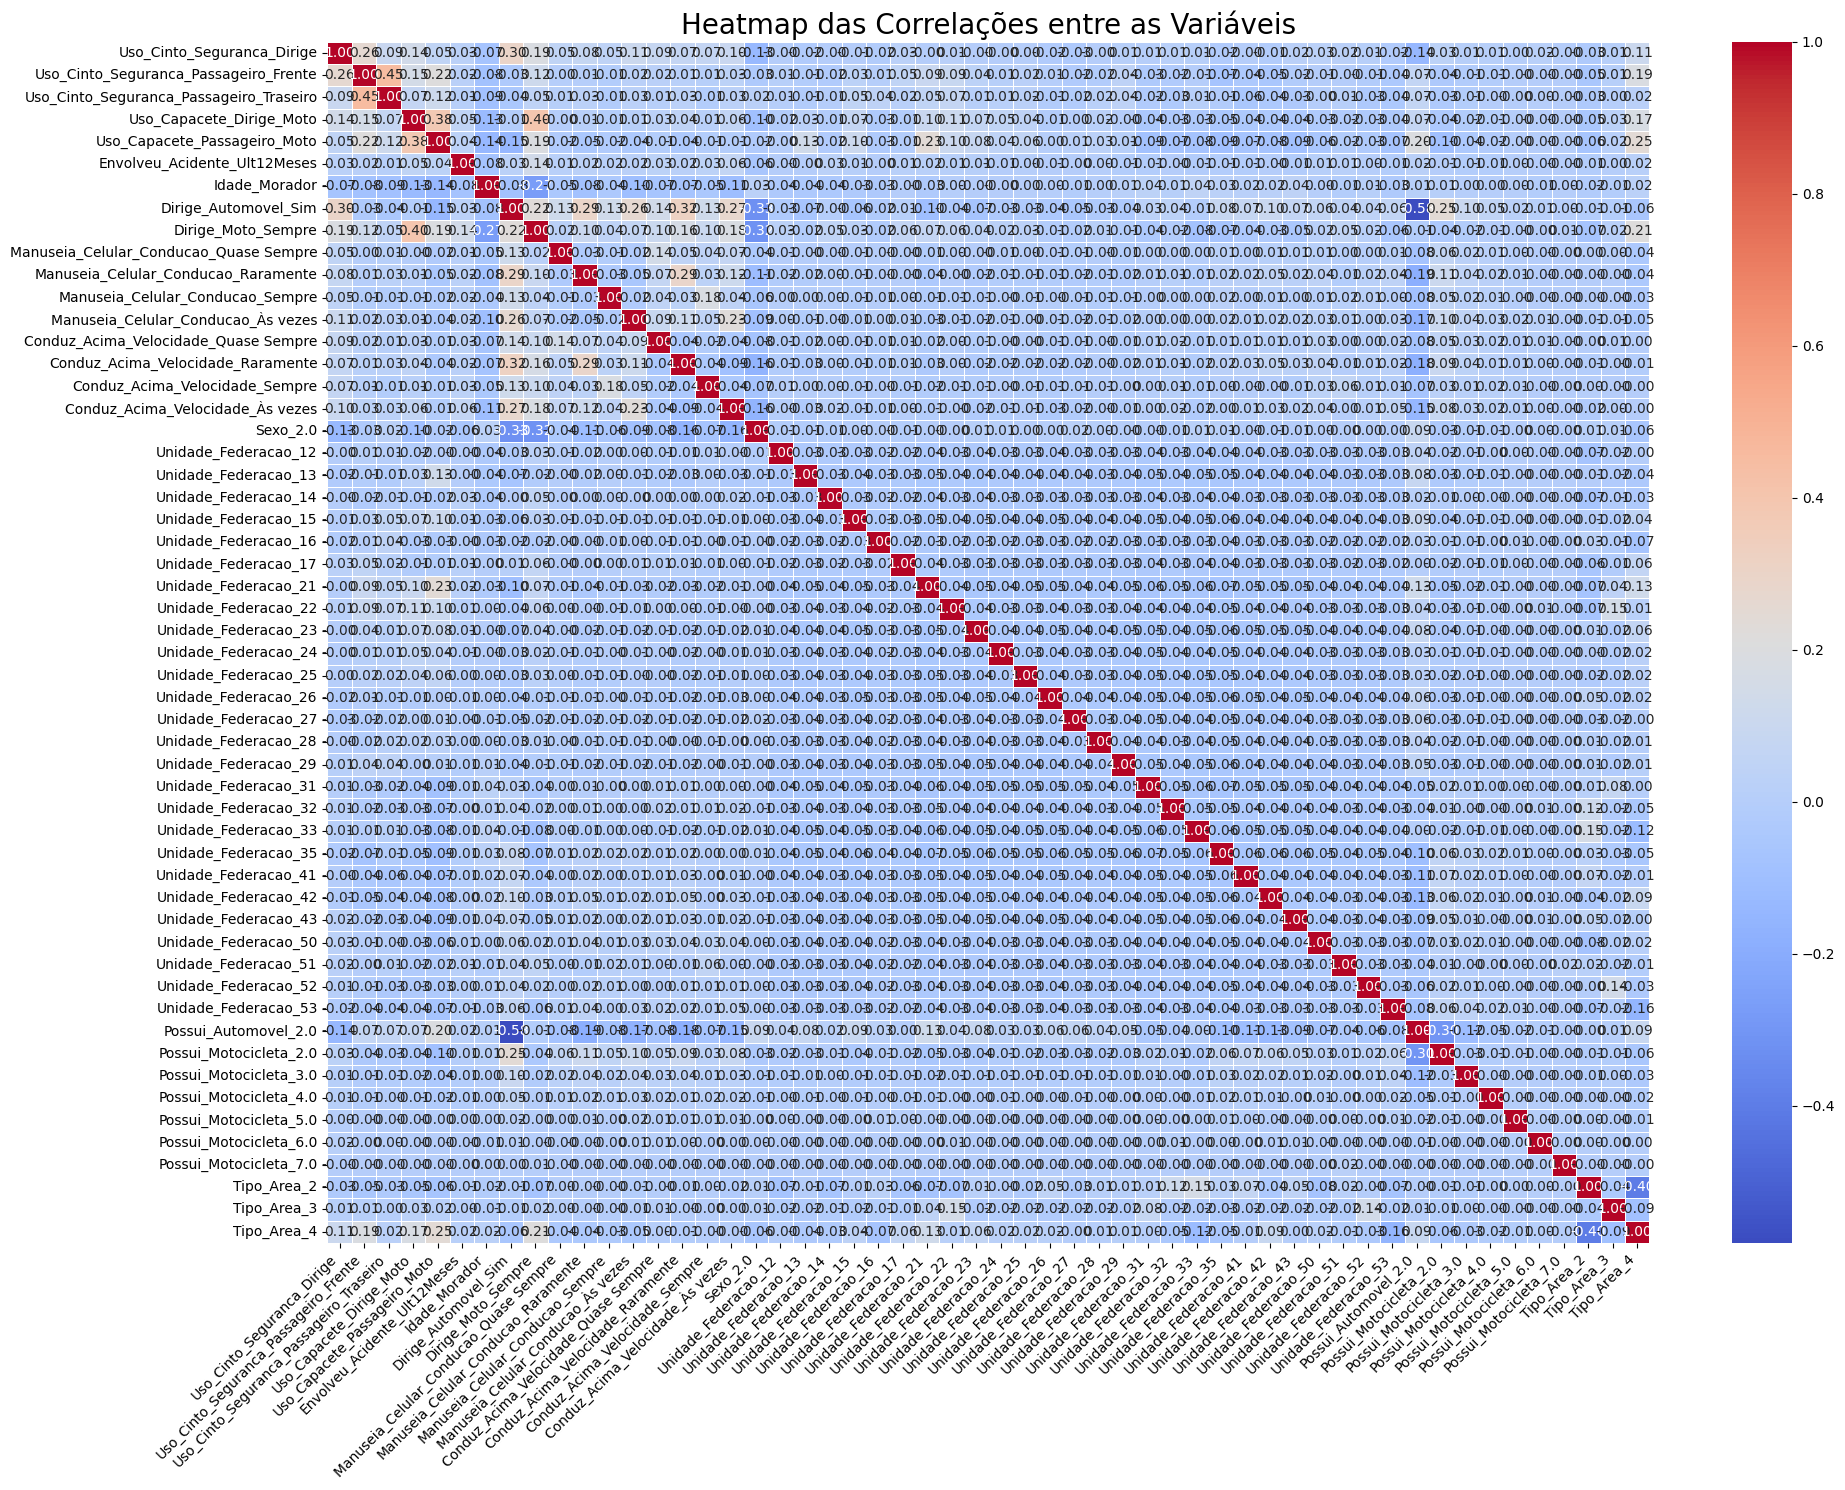

In [158]:
# Calcular a matriz de correlação
corr_matrix = df_filter.corr()

# Configurar o tamanho da figura
plt.figure(figsize=(20, 15))

# Gerar o heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Ajustar o título e os rótulos
plt.title("Heatmap das Correlações entre as Variáveis", fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Exibir o heatmap
plt.tight_layout()
plt.show()

## Separando x e y

In [159]:
df_filter.head()

,Uso_Cinto_Seguranca_Dirige,Uso_Cinto_Seguranca_Passageiro_Frente,Uso_Cinto_Seguranca_Passageiro_Traseiro,Uso_Capacete_Dirige_Moto,Uso_Capacete_Passageiro_Moto,Envolveu_Acidente_Ult12Meses,Idade_Morador,Dirige_Automovel_Sim,Dirige_Moto_Sempre,Manuseia_Celular_Conducao_Quase Sempre,...,Possui_Automovel_2.0,Possui_Motocicleta_2.0,Possui_Motocicleta_3.0,Possui_Motocicleta_4.0,Possui_Motocicleta_5.0,Possui_Motocicleta_6.0,Possui_Motocicleta_7.0,Tipo_Area_2,Tipo_Area_3,Tipo_Area_4
0,0,1,1,0,0,0,0.489012,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0,1,4,0,1,0,-1.556790,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0,1,1,0,1,0,-0.079267,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,0,1,4,0,1,0,0.659495,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,0,1,1,0,1,0,-1.045339,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [160]:
# Separando df X e y
X = df_filter.drop(columns=['Envolveu_Acidente_Ult12Meses'])
y = df_filter['Envolveu_Acidente_Ult12Meses']

## Visualizando desbalanceamento

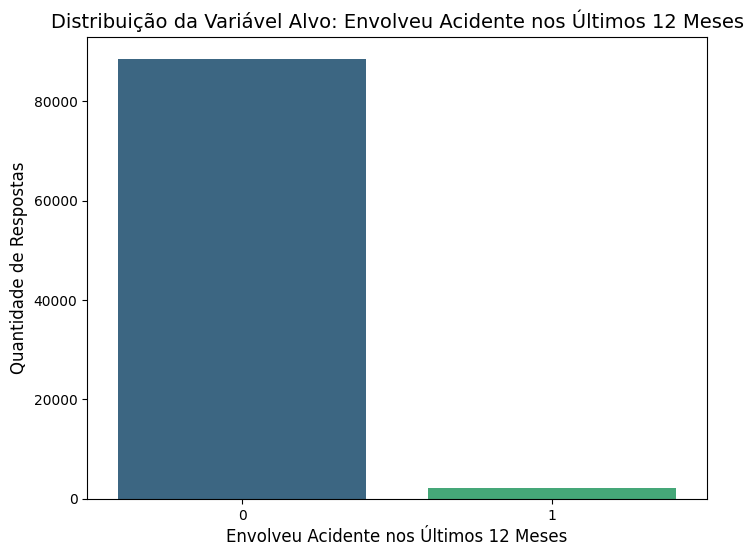

In [161]:
# Criar o gráfico de barras usando seaborn
plt.figure(figsize=(8,6))
sns.countplot(x=y, palette='viridis')

# Adicionar título e rótulos aos eixos
plt.title('Distribuição da Variável Alvo: Envolveu Acidente nos Últimos 12 Meses', fontsize=14)
plt.xlabel('Envolveu Acidente nos Últimos 12 Meses', fontsize=12)
plt.ylabel('Quantidade de Respostas', fontsize=12)

# Exibir o gráfico
plt.show()


## Divindo em treino e teste

In [162]:
# Dividir os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Verificar a distribuição das classes no conjunto de treino e teste
print("Distribuição das classes no conjunto de treinamento:")
print(y_train.value_counts(normalize=True))

print("\nDistribuição das classes no conjunto de teste:")
print(y_test.value_counts(normalize=True))

Distribuição das classes no conjunto de treinamento:
Envolveu_Acidente_Ult12Meses
0    0.97515
1    0.02485
Name: proportion, dtype: float64

Distribuição das classes no conjunto de teste:
Envolveu_Acidente_Ult12Meses
0    0.975179
1    0.024821
Name: proportion, dtype: float64


## Balanceando

In [163]:
warnings.filterwarnings(
    "ignore",
    category=UserWarning,
    module='joblib.externals.loky.backend.context'
)

# Inicializar o SMOTEENN
smoteenn = SMOTEENN(sampling_strategy='auto', random_state=42)

# Aplicar o SMOTEENN apenas no conjunto de treinamento
X_train_balanced, y_train_balanced = smoteenn.fit_resample(X_train, y_train)

# Verificar a nova distribuição das classes no conjunto de treinamento balanceado
print("\nDistribuição das classes após aplicar o SMOTEENN no conjunto de treinamento:")
print(pd.Series(y_train_balanced).value_counts(normalize=True))


Distribuição das classes após aplicar o SMOTEENN no conjunto de treinamento:
Envolveu_Acidente_Ult12Meses
1    0.524763
0    0.475237
Name: proportion, dtype: float64


## Treinando


=== Random Forest ===
              precision    recall  f1-score   support

           0       0.98      0.87      0.93     17719
           1       0.08      0.43      0.14       451

    accuracy                           0.86     18170
   macro avg       0.53      0.65      0.53     18170
weighted avg       0.96      0.86      0.91     18170



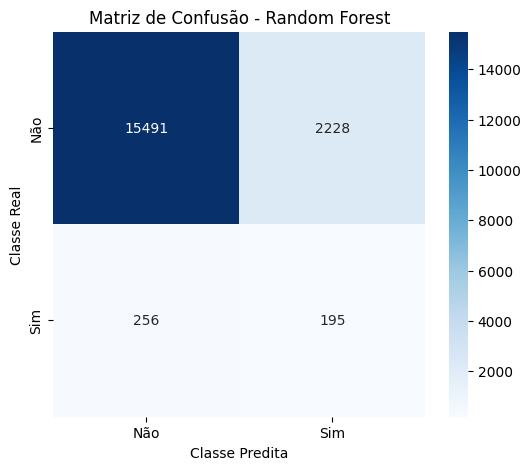

AUC-ROC: 0.75


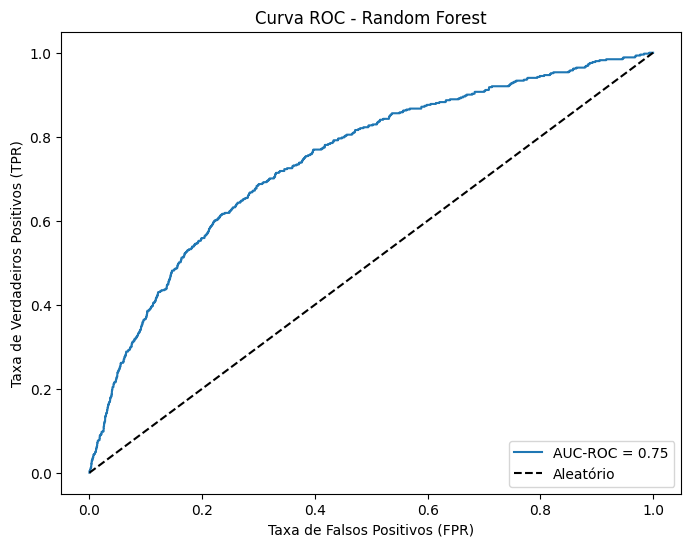

AUC-PR: 0.08


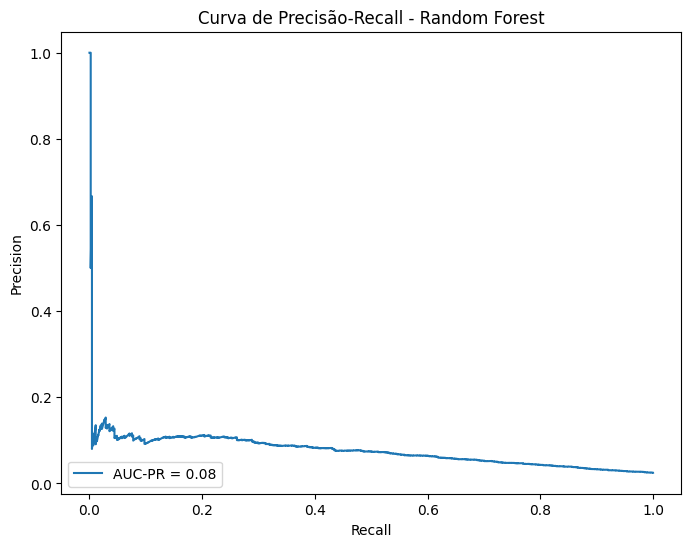

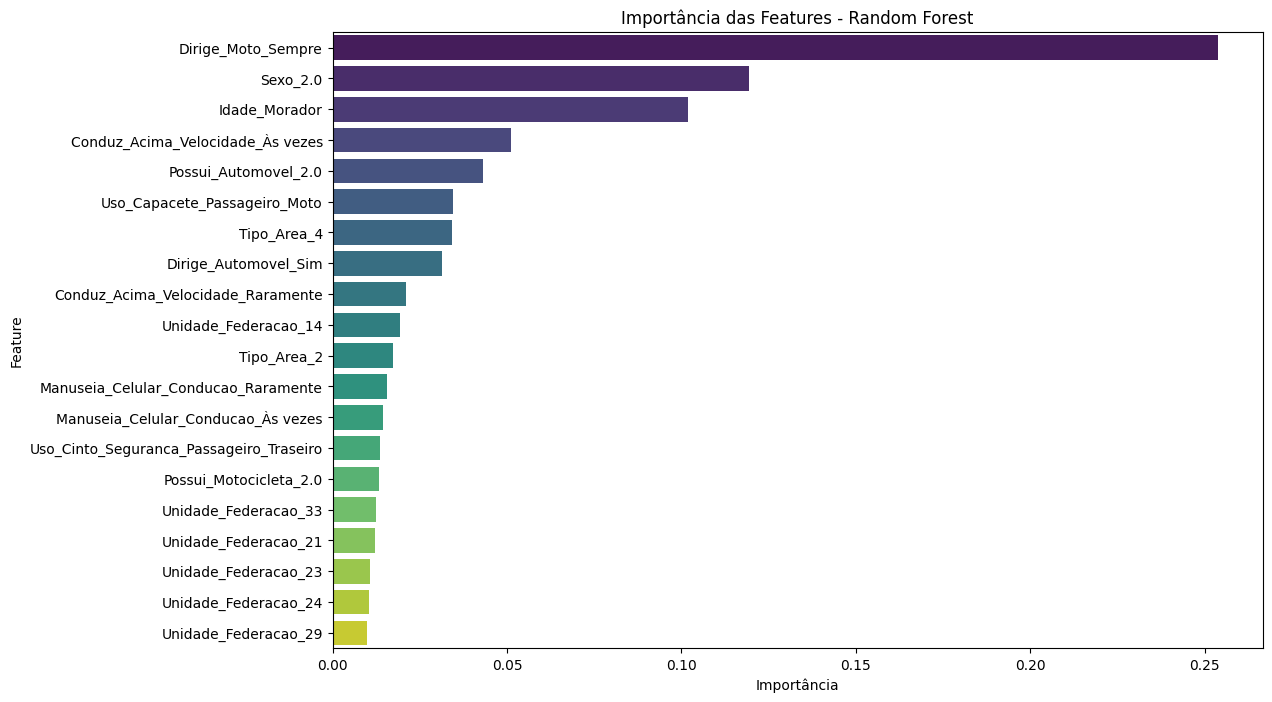

In [164]:
# --- Treinamento Inicial do Modelo Random Forest ---
import joblib
from sklearn.metrics import average_precision_score, precision_recall_curve, roc_curve
from sklearn.model_selection import StratifiedKFold


rf_weighted = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# Treinar o modelo
rf_weighted.fit(X_train_balanced, y_train_balanced)

# Fazer previsões
y_pred_rf_weighted = rf_weighted.predict(X_test)
y_pred_rf_weighted_proba = rf_weighted.predict_proba(X_test)[:, 1]

# Avaliar o modelo
print("\n=== Random Forest ===")
print(classification_report(y_test, y_pred_rf_weighted))

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred_rf_weighted)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Não', 'Sim'], yticklabels=['Não', 'Sim'])
plt.ylabel('Classe Real')
plt.xlabel('Classe Predita')
plt.title('Matriz de Confusão - Random Forest')
plt.show()

# AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_rf_weighted_proba)
print(f"AUC-ROC: {auc_roc:.2f}")

# Plotar a Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf_weighted_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC-ROC = {auc_roc:.2f}')
plt.plot([0,1], [0,1], 'k--', label='Aleatório')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC - Random Forest')
plt.legend(loc='lower right')
plt.show()

# AUC-PR
auc_pr = average_precision_score(y_test, y_pred_rf_weighted_proba)
print(f"AUC-PR: {auc_pr:.2f}")

# Plotar a Curva de Precisão-Recall
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_rf_weighted_proba)
plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f'AUC-PR = {auc_pr:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva de Precisão-Recall - Random Forest')
plt.legend(loc='lower left')
plt.show()

# --- Importância das Features ---
importances = rf_weighted.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), palette='viridis')
plt.title('Importância das Features - Random Forest')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.show()

## Usando hiperparâmetros com GridSearchCV

Fitting 5 folds for each of 162 candidates, totalling 810 fits

Melhor combinação de parâmetros encontrada pelo GridSearchCV:
{'class_weight': 'balanced_subsample', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

=== Melhor Random Forest após GridSearchCV ===
              precision    recall  f1-score   support

           0       0.98      0.93      0.95     17719
           1       0.09      0.28      0.14       451

    accuracy                           0.91     18170
   macro avg       0.54      0.61      0.55     18170
weighted avg       0.96      0.91      0.93     18170



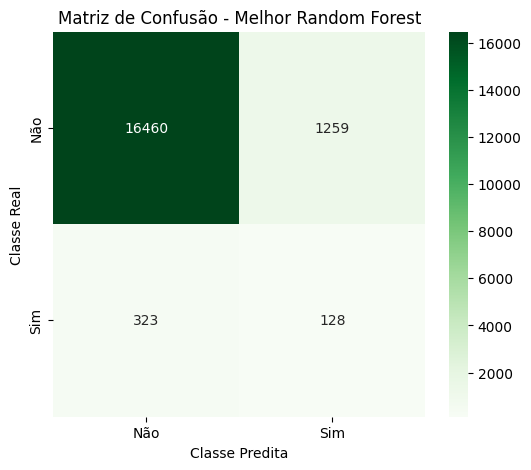

AUC-ROC do Melhor Modelo: 0.73


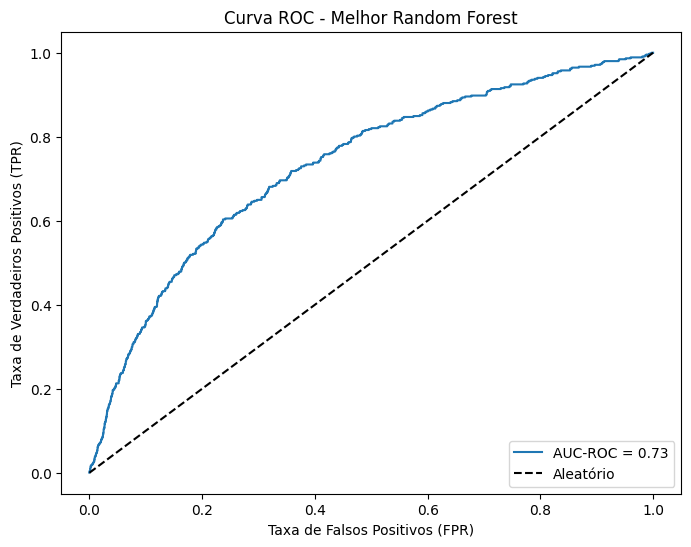

AUC-PR do Melhor Modelo: 0.07


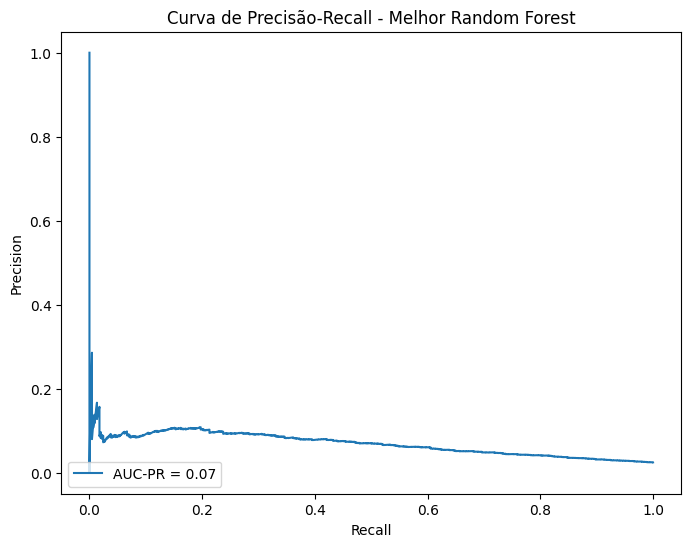

In [165]:
# --- Ajuste de Hiperparâmetros com GridSearchCV ---
# Definir a grade de parâmetros para busca
param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample']
}

# Inicializar o Random Forest para Grid Search
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Definir a estratégia de validação cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inicializar o GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=cv,
    scoring='f1',  # Foco na métrica F1 para a classe minoritária
    n_jobs=-1,
    verbose=2
)

# Executar o Grid Search
grid_search.fit(X_train_balanced, y_train_balanced)

# Melhor combinação de parâmetros
print("\nMelhor combinação de parâmetros encontrada pelo GridSearchCV:")
print(grid_search.best_params_)

# Melhor estimador
best_rf = grid_search.best_estimator_

# Fazer previsões com o melhor modelo
y_pred_best_rf = best_rf.predict(X_test)
y_pred_best_rf_proba = best_rf.predict_proba(X_test)[:, 1]

# Avaliar o melhor modelo
print("\n=== Melhor Random Forest após GridSearchCV ===")
print(classification_report(y_test, y_pred_best_rf))

# Matriz de Confusão
conf_matrix_best = confusion_matrix(y_test, y_pred_best_rf)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Greens', xticklabels=['Não', 'Sim'], yticklabels=['Não', 'Sim'])
plt.ylabel('Classe Real')
plt.xlabel('Classe Predita')
plt.title('Matriz de Confusão - Melhor Random Forest')
plt.show()

# AUC-ROC
auc_roc_best = roc_auc_score(y_test, y_pred_best_rf_proba)
print(f"AUC-ROC do Melhor Modelo: {auc_roc_best:.2f}")

# Plotar a Curva ROC
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, y_pred_best_rf_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr_best, tpr_best, label=f'AUC-ROC = {auc_roc_best:.2f}')
plt.plot([0,1], [0,1], 'k--', label='Aleatório')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC - Melhor Random Forest')
plt.legend(loc='lower right')
plt.show()

# AUC-PR
auc_pr_best = average_precision_score(y_test, y_pred_best_rf_proba)
print(f"AUC-PR do Melhor Modelo: {auc_pr_best:.2f}")

# Plotar a Curva de Precisão-Recall
precision_best, recall_best, thresholds_pr_best = precision_recall_curve(y_test, y_pred_best_rf_proba)
plt.figure(figsize=(8,6))
plt.plot(recall_best, precision_best, label=f'AUC-PR = {auc_pr_best:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva de Precisão-Recall - Melhor Random Forest')
plt.legend(loc='lower left')
plt.show()

## Rede Neural MLP


=== Rede Neural (MLPClassifier) ===
              precision    recall  f1-score   support

           0       0.98      0.91      0.94     17719
           1       0.06      0.21      0.09       451

    accuracy                           0.89     18170
   macro avg       0.52      0.56      0.51     18170
weighted avg       0.96      0.89      0.92     18170



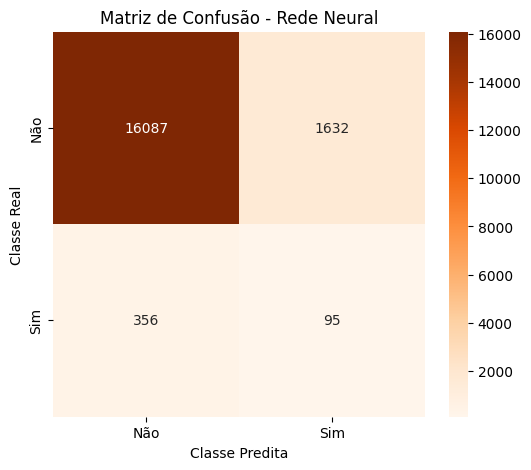

AUC-ROC: 0.63


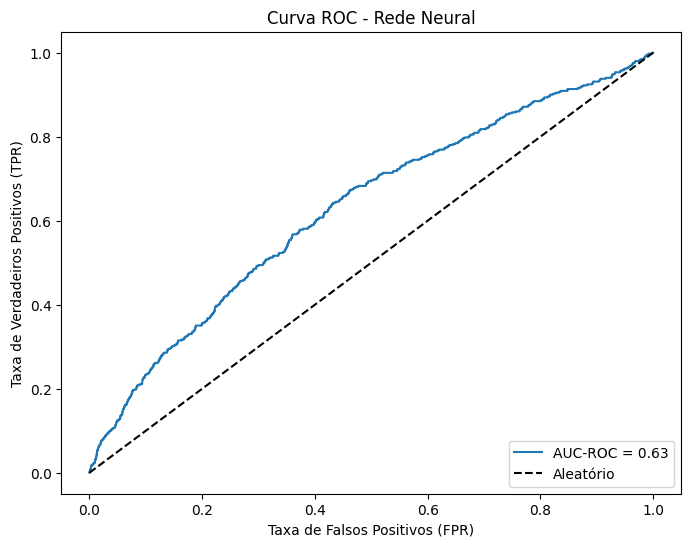

AUC-PR: 0.04


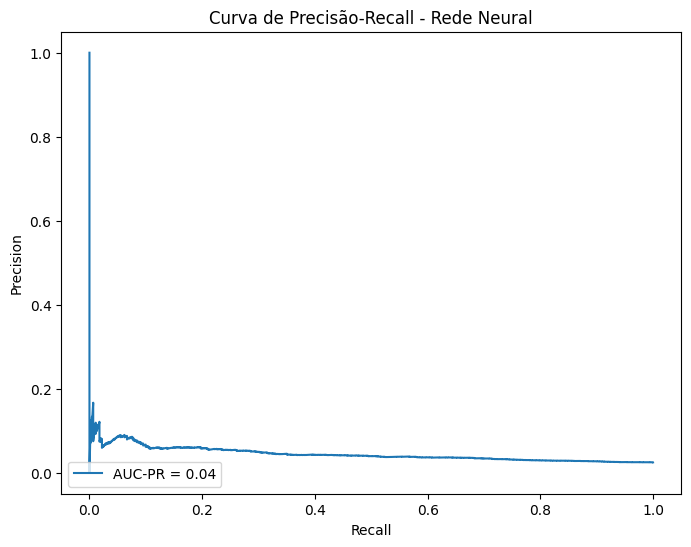

In [167]:
# Inicializar o MLPClassifier
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),  # Estrutura das camadas ocultas
    activation='relu',
    solver='adam',
    max_iter=300,
    random_state=42,
)

# Treinar o MLPClassifier
mlp.fit(X_train_balanced, y_train_balanced)

# Fazer previsões
y_pred_mlp = mlp.predict(X_test)
y_pred_mlp_proba = mlp.predict_proba(X_test)[:, 1]

# Avaliar o MLPClassifier
print("\n=== Rede Neural (MLPClassifier) ===")
print(classification_report(y_test, y_pred_mlp))

# Matriz de Confusão
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Oranges', xticklabels=['Não', 'Sim'], yticklabels=['Não', 'Sim'])
plt.ylabel('Classe Real')
plt.xlabel('Classe Predita')
plt.title('Matriz de Confusão - Rede Neural')
plt.show()

# AUC-ROC
auc_roc_mlp = roc_auc_score(y_test, y_pred_mlp_proba)
print(f"AUC-ROC: {auc_roc_mlp:.2f}")

# Plotar a Curva ROC
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, y_pred_mlp_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr_mlp, tpr_mlp, label=f'AUC-ROC = {auc_roc_mlp:.2f}')
plt.plot([0,1], [0,1], 'k--', label='Aleatório')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC - Rede Neural')
plt.legend(loc='lower right')
plt.show()

# AUC-PR
auc_pr_mlp = average_precision_score(y_test, y_pred_mlp_proba)
print(f"AUC-PR: {auc_pr_mlp:.2f}")

# Plotar a Curva de Precisão-Recall
precision_mlp, recall_mlp, thresholds_pr_mlp = precision_recall_curve(y_test, y_pred_mlp_proba)
plt.figure(figsize=(8,6))
plt.plot(recall_mlp, precision_mlp, label=f'AUC-PR = {auc_pr_mlp:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva de Precisão-Recall - Rede Neural')
plt.legend(loc='lower left')
plt.show()

## Gradient Boosting


=== Gradient Boosting (GradientBoostingClassifier) ===
              precision    recall  f1-score   support

           0       0.98      0.91      0.94     17719
           1       0.08      0.34      0.13       451

    accuracy                           0.89     18170
   macro avg       0.53      0.62      0.54     18170
weighted avg       0.96      0.89      0.92     18170



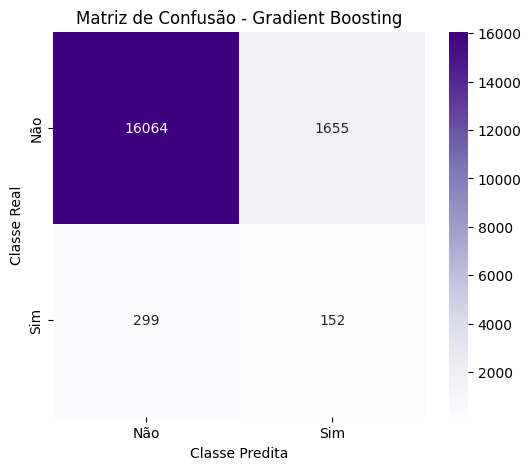

AUC-ROC: 0.75


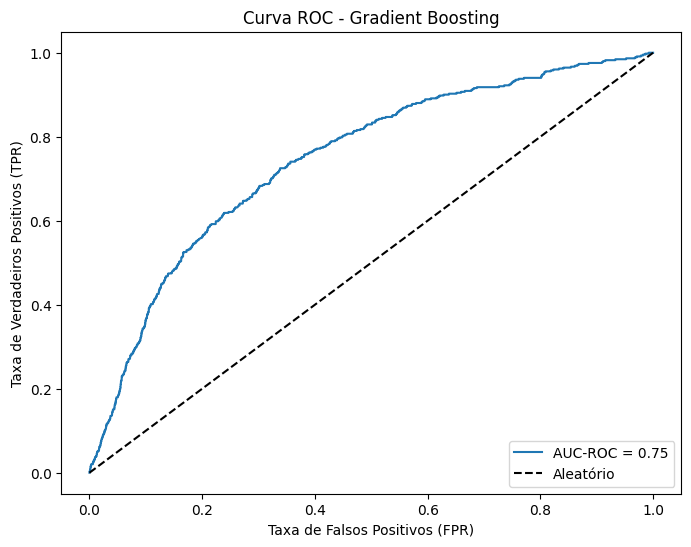

AUC-PR: 0.07


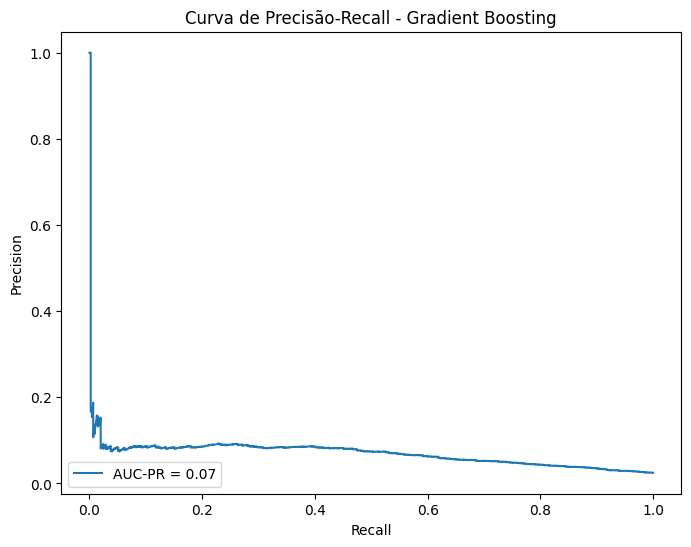

In [170]:
# Inicializar o GradientBoostingClassifier
gb = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Treinar o GradientBoostingClassifier
gb.fit(X_train_balanced, y_train_balanced)

# Fazer previsões
y_pred_gb = gb.predict(X_test)
y_pred_gb_proba = gb.predict_proba(X_test)[:, 1]

# Avaliar o GradientBoostingClassifier
print("\n=== Gradient Boosting (GradientBoostingClassifier) ===")
print(classification_report(y_test, y_pred_gb))

# Matriz de Confusão
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Purples', xticklabels=['Não', 'Sim'], yticklabels=['Não', 'Sim'])
plt.ylabel('Classe Real')
plt.xlabel('Classe Predita')
plt.title('Matriz de Confusão - Gradient Boosting')
plt.show()

# AUC-ROC
auc_roc_gb = roc_auc_score(y_test, y_pred_gb_proba)
print(f"AUC-ROC: {auc_roc_gb:.2f}")

# Plotar a Curva ROC
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred_gb_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr_gb, tpr_gb, label=f'AUC-ROC = {auc_roc_gb:.2f}')
plt.plot([0,1], [0,1], 'k--', label='Aleatório')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC - Gradient Boosting')
plt.legend(loc='lower right')
plt.show()

# AUC-PR
auc_pr_gb = average_precision_score(y_test, y_pred_gb_proba)
print(f"AUC-PR: {auc_pr_gb:.2f}")

# Plotar a Curva de Precisão-Recall
precision_gb, recall_gb, thresholds_pr_gb = precision_recall_curve(y_test, y_pred_gb_proba)
plt.figure(figsize=(8,6))
plt.plot(recall_gb, precision_gb, label=f'AUC-PR = {auc_pr_gb:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva de Precisão-Recall - Gradient Boosting')
plt.legend(loc='lower left')
plt.show()